In [27]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [51]:
data = pd.read_csv("C:\\Users\\SUYDUBEY\\Documents\\Data Science\\Sample datasets\\autos.csv",encoding='latin-1')

In [52]:
data.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [53]:
data.shape

(371528, 20)

In [54]:
data.isnull().sum()

dateCrawled                0
name                       0
seller                     0
offerType                  0
price                      0
abtest                     0
vehicleType            37869
yearOfRegistration         0
gearbox                20209
powerPS                    0
model                  20484
kilometer                  0
monthOfRegistration        0
fuelType               33386
brand                      0
notRepairedDamage      72060
dateCreated                0
nrOfPictures               0
postalCode                 0
lastSeen                   0
dtype: int64

In [55]:
data.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
count,3.715280e+05,371528.000000,371528.000000,371528.000000,371528.000000,371528.0,371528.00000
mean,1.729514e+04,2004.577997,115.549477,125618.688228,5.734445,0.0,50820.66764
std,3.587954e+06,92.866598,192.139578,40112.337051,3.712412,0.0,25799.08247
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.00000
25%,1.150000e+03,1999.000000,70.000000,125000.000000,3.000000,0.0,30459.00000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,0.0,49610.00000
75%,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000,0.0,71546.00000
max,2.147484e+09,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.00000


In [56]:
data['vehicleType'].isnull().value_counts()

False    333659
True      37869
Name: vehicleType, dtype: int64

In [57]:
data['vehicleType'].isnull().values.sum()

37869

In [58]:
data['vehicleType'].fillna("other",inplace=True)
data['vehicleType'].isnull().values.sum()

0

In [59]:
data['offerType'].unique()

array(['Angebot', 'Gesuch'], dtype=object)

In [60]:
data['offerType']=data['offerType'].map({'Gesuch':'Application','Angebot':'Offer'})

In [61]:
data['offerType'].unique()

array(['Offer', 'Application'], dtype=object)

<AxesSubplot:xlabel='vehicleType', ylabel='price'>

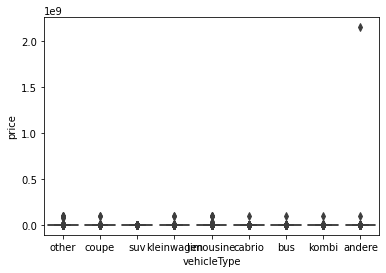

In [62]:
sns.boxplot(x='vehicleType',y='price',data=data)

In [64]:
median_=df.groupby('vehicleType')['price'].median()
quantile75_=data.groupby('vehicleType')['price'].quantile(0.75)
quantile25_=data.groupby('vehicleType')['price'].quantile(0.25)

iqr=(quantile75_ - quantile25_)*1.5+median_
iqr

vehicleType
andere         8434.0
bus           13948.5
cabrio        21400.0
coupe         24300.0
kleinwagen     5775.0
kombi         13076.5
limousine     12801.5
other          5100.0
suv           28800.0
Name: price, dtype: float64

In [65]:
data=data[
          ((data['vehicleType']=="andere") & (data['price'] <= 8434)) | 
          ((data['vehicleType']=="bus") & (data['price'] <= 13948)) | 
          ((data['vehicleType']=="cabrio") & (data['price'] <= 21400)) | 
          ((data['vehicleType']=="coupe") & (data['price'] <= 24300)) | 
          ((data['vehicleType']=="kleinwagen") & (data['price'] <= 13076)) | 
          ((data['vehicleType']=="limousine") & (data['price'] <= 12801)) | 
          ((data['vehicleType']=="other") & (data['price'] <= 12801)) |
          ((data['vehicleType']=="suv") & (data['price'] <= 28800)) 


]
data.shape

(280043, 20)

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 280043 entries, 0 to 371525
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          280043 non-null  object
 1   name                 280043 non-null  object
 2   seller               280043 non-null  object
 3   offerType            280043 non-null  object
 4   price                280043 non-null  int64 
 5   abtest               280043 non-null  object
 6   vehicleType          280043 non-null  object
 7   yearOfRegistration   280043 non-null  int64 
 8   gearbox              262164 non-null  object
 9   powerPS              280043 non-null  int64 
 10  model                262826 non-null  object
 11  kilometer            280043 non-null  int64 
 12  monthOfRegistration  280043 non-null  int64 
 13  fuelType             250987 non-null  object
 14  brand                280043 non-null  object
 15  notRepairedDamage    220000 non-nu

In [67]:
data['gearbox'].isnull().sum()

17879

In [68]:
data['gearbox'].unique()

array(['manuell', 'automatik', nan], dtype=object)

In [69]:
data['gearbox'].fillna('other',inplace=True)

In [70]:
data['gearbox'].isnull().sum()

0